In [1]:
## General imports ###
from glob import glob
import os
import pickle
import itertools
import pandas as pd
import numpy as np

### Warning import ###
import warnings
warnings.filterwarnings('ignore')

### Graph imports ###
import matplotlib.pyplot as plt

### Sklearn imports ###
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:

# Load datas from pickle
[features, labels] = pickle.load(open("Pickle/[RAVDESS][HAP-SAD-NEU-ANG-FEA-DIS-SUR][GLOBAL_STATS].p", "rb"))

In [44]:
features[1]

array([ 2.82551667e-02,  4.06557338e+03,  1.68194848e+00,  2.10625560e-01,
        1.89045533e-01,  1.23886736e+00,  3.26944361e-03,  2.85058147e-01,
        5.15381747e+01,  1.17118760e+01,  1.06188215e+01,  1.08901903e+00,
        7.00300589e+00, -2.70694290e+00,  7.95496389e-01, -4.62051278e+00,
       -4.11520396e-01, -2.00709168e+00, -1.63635213e+00,  3.85208898e-01,
        4.08425436e-02,  1.22818174e+04,  1.02740638e+00,  1.58061843e-01,
        8.54645548e-02,  1.28096979e+00,  4.83878839e-03,  2.99346543e-01,
        6.80426693e+01,  2.56943228e+01,  1.98669551e+01,  1.19871588e+01,
        1.33577880e+01,  1.19332854e+01,  1.06031420e+01,  1.17383216e+01,
        9.19659640e+00,  7.91595934e+00,  8.21439443e+00,  9.42645696e+00,
        1.54405086e-02,  3.11980096e+00,  2.21965589e+00,  1.71346654e-01,
        1.96239577e-01,  5.13788049e-01,  1.90421131e-03,  8.80217786e-02,
        3.91331365e+01,  9.51006933e+00,  9.04996900e+00,  0.00000000e+00,
        5.12782066e+00,  

In [50]:
labels[9]

'm_HAP'

In [12]:

# Build Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

# Encode Label from categorical to numerical
lb = LabelEncoder()
lb.fit(y_train)
y_train, y_test = lb.transform(y_train), lb.transform(y_test)

In [13]:
# Scale train and test dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

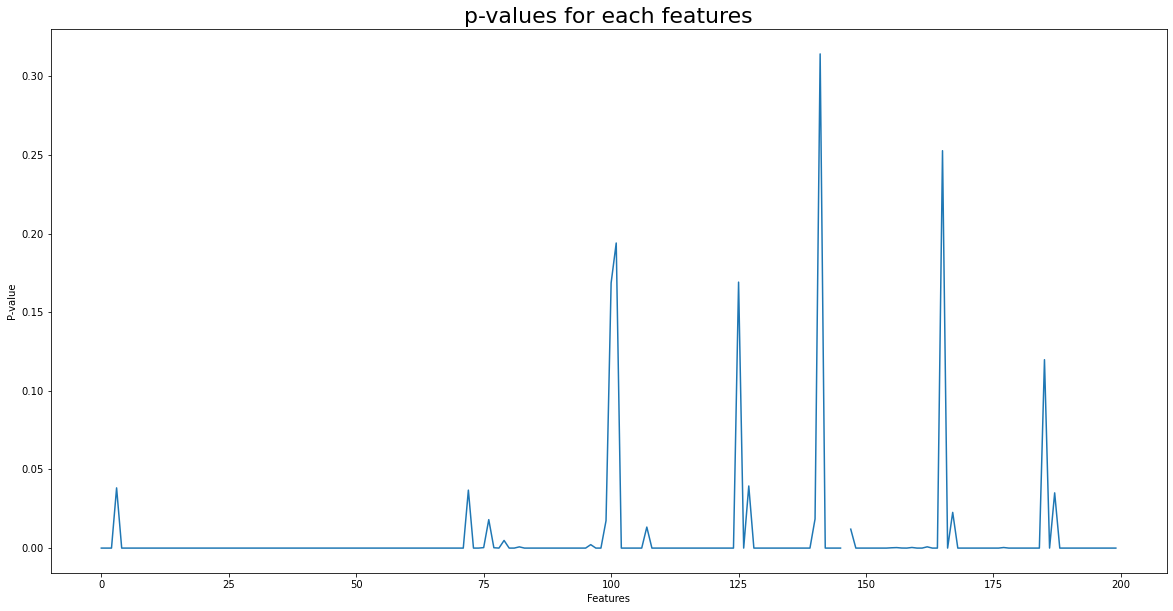

Number of p-values > à 1% : 16


In [14]:
# k-highest scores analysis on features
Kbest = SelectKBest(k="all")
selected_features = Kbest.fit(X_train, y_train)

# Plot P-values
plt.figure(figsize=(20, 10))
plt.plot(selected_features.pvalues_)
plt.title("p-values for each features", fontsize=22)
plt.xlabel("Features")
plt.ylabel("P-value")
plt.show()

# Display Comment
alpha = 0.01
print("Number of p-values > à 1% : {}".format(np.sum(selected_features.pvalues_ > alpha)))

In [15]:
# Remove non-significant features
X_train = X_train[:,np.where(selected_features.pvalues_ < alpha)[0]]
X_test = X_test[:,np.where(selected_features.pvalues_ < alpha)[0]]

In [47]:
X_train[1]

array([-7.94219976e+00,  1.10458393e+00,  3.54859266e+00, -2.88916839e+00,
        4.06821993e-01, -6.84305536e-01, -8.94323090e-01, -1.01069454e+00,
       -2.48828685e+00,  5.90021096e-01, -5.29854814e-01, -1.46599923e+00,
        8.38690304e-01, -1.00714532e+00, -1.02328839e+00,  1.47372637e+00,
       -7.49904976e-01,  7.09168536e-01,  1.61027615e+00,  1.27763916e+00,
       -2.92817740e+00,  1.04596341e+00,  1.92739731e+00,  1.62372725e+00,
       -1.39881649e+00,  3.93872588e-01,  1.00806896e+00, -2.50860885e+00,
       -1.80519582e+00, -1.34108585e+00,  1.82746609e+00, -5.86973286e-01,
        2.82648617e-01, -3.35099755e-01, -1.37193526e+00,  3.34064194e-01,
        1.93373351e+00,  5.68434941e-01, -8.88144859e-02,  8.48527511e-01,
       -1.24451079e-01,  9.83963861e-01,  1.28118663e-01, -7.12318490e-01,
       -1.34979320e-01, -5.11629612e-01, -3.73407502e-01,  1.23159985e-02,
       -5.14996353e-01,  4.95320166e-01,  2.69221841e-01, -6.11004206e-02,
        2.59596807e-01,  

In [26]:
selected_features

SelectKBest(k='all')

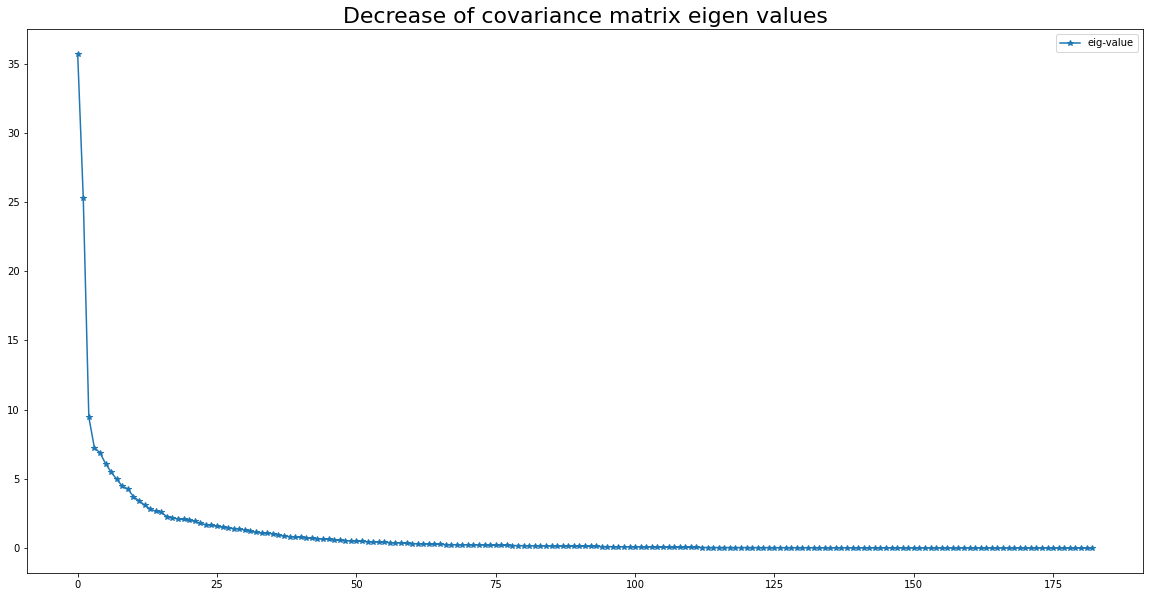

In [16]:

# Covariance matrix
cov = pd.DataFrame(X_train).cov()

# Eigen values of covariance matrix
eig = np.linalg.svd(cov)[1]

# Plot eigen graph
fig = plt.figure(figsize=(20, 10))
plt.title('Decrease of covariance matrix eigen values', fontsize = 22)
plt.plot(eig, '-*', label = "eig-value")
plt.legend(loc = 'upper right')
plt.show()

In [17]:
# Initialize PCA
pca = PCA(n_components=140)

# Apply PCA on train and test set
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [27]:
len(X_train[1])

140

In [53]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [9]:

# Set C and Gamma parameters list
G_list = [0.001, 0.005, 0.01]
C_list = [1, 2, 3, 4, 5, 7, 10, 20, 50]

# Set the parameters for cross-validation
parameters = [{'kernel': ['rbf'], 'C': C_list, 'gamma': G_list}]

# Initialize SVM model
model = SVC(decision_function_shape='ovr')

# Cross Validation 
cv = GridSearchCV(model, parameters, cv=3, verbose=0, n_jobs=-1).fit(X_train, y_train)

# Print Best parameters
print("Best parameters set found on train set:")
print(cv.best_params_)

Best parameters set found on train set:
{'C': 4, 'gamma': 0.005, 'kernel': 'rbf'}


In [10]:
# Confusion matrix plot function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.tight_layout()

Accuracy Score on test dataset: 68.77%


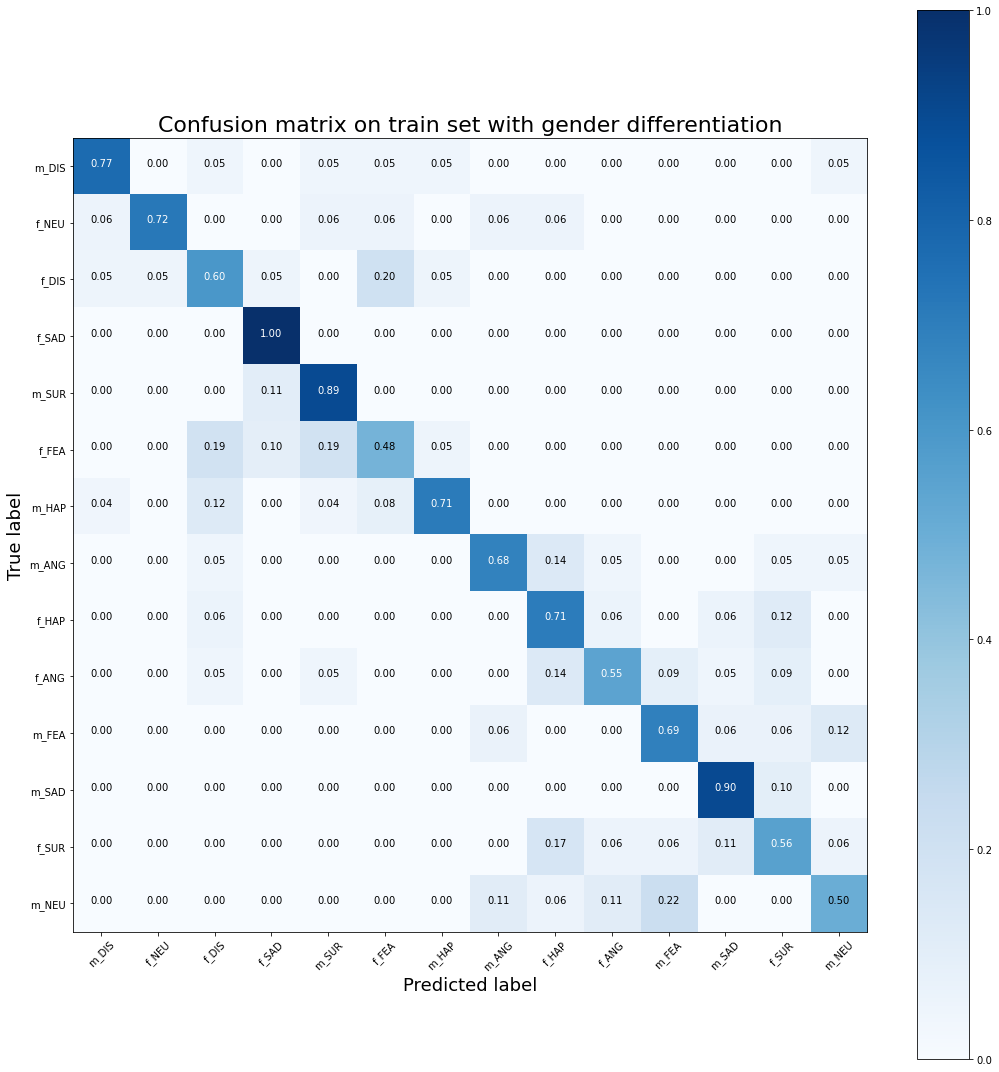

In [11]:

# Fit best mode
model = SVC(kernel='rbf', C=3, gamma=0.005, decision_function_shape='ovr').fit(X_train, y_train)

# Prediction
pred = model.predict(X_test)

# Score
score = model.score(X_test, y_test)

# Reverse label encoder
pred = (lb.inverse_transform((pred.astype(int).flatten())))
actual = (lb.inverse_transform((y_test.astype(int).flatten())))

# Build dataFrame
df_pred = pd.DataFrame({'Actual': actual, 'Prediction': pred})

# Print Score
print('Accuracy Score on test dataset: {}%'.format(np.round(100 * score,2)))

# Compute confusion matrix
confusion = confusion_matrix(actual, pred)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 15))
plot_confusion_matrix(confusion, classes=set(actual),normalize=True,
                      title='Confusion matrix on train set with gender differentiation')

Accuracy Score on test dataset: 69.52%


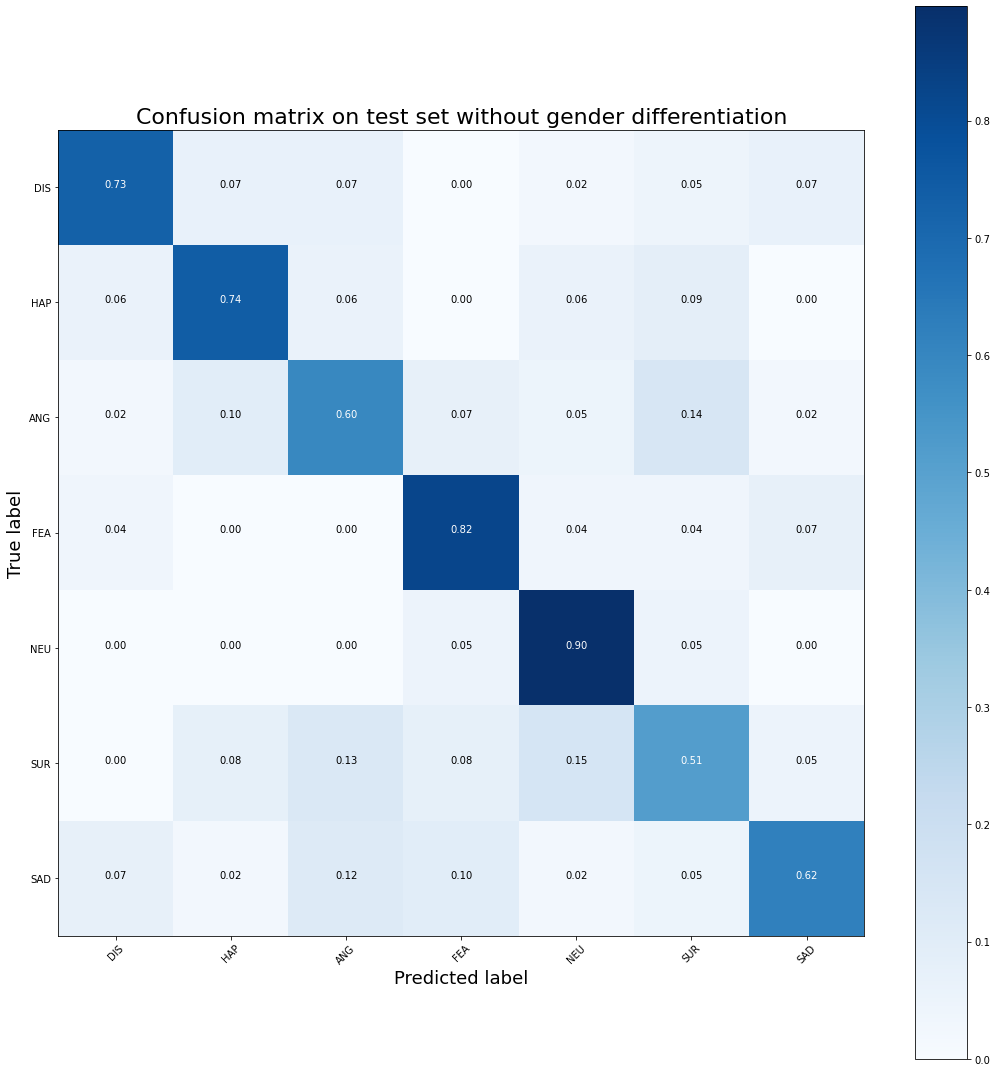

In [12]:
# Compute prediction without gender differentation
PRED = list(map(lambda i:i[2:], pred))
ACTUAL = list(map(lambda i:i[2:], actual))

# Compute related prediction score
SCORE = accuracy_score(ACTUAL, PRED)

# Print Score
print('Accuracy Score on test dataset: {}%'.format(np.round(100 * SCORE,2)))

# Compute confusion matrix
confusion = confusion_matrix(ACTUAL, PRED)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 15))
plot_confusion_matrix(confusion, classes=set(ACTUAL),normalize=True,
                      title='Confusion matrix on test set without gender differentiation')

In [15]:
# save the model to local
pickle.dump(model, open('Model/MODEL_CLASSIFIER.p', 'wb'))

# Save label encoder
pickle.dump(lb, open("Model/MODEL_ENCODER.p", "wb"))

# Save PCA
pickle.dump(pca, open("Model/MODEL_PCA.p", "wb"))

# Save MEAN and STD of each features
MEAN = features.mean(axis=0)
STD = features.std(axis=0)
pickle.dump([MEAN, STD], open("Model/MODEL_SCALER.p", "wb"))

# Save feature parameters
stats = ['mean', 'std', 'kurt', 'skew', 'q1', 'q99']
features_list = ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'sprectral_rolloff']
win_step = 0.01
win_size = 0.025
nb_mfcc = 12
diff = 0
PCA = True
DICO = {'stats':stats, 'features_list':features_list, 'win_size':win_size, 'win_step':win_step, 'nb_mfcc':nb_mfcc, 'diff':diff, 'PCA':PCA}
pickle.dump(DICO, open("Model/MODEL_PARAM.p", "wb"))

In [36]:
y_train

array([13,  5,  2, ...,  6,  9, 11], dtype=int64)